##Ankush Dey

##Roll:- MDS202108

In [ ]:
import cv2, time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

### $\color{yellow}{\text{4.10 Consider the function $f(t) = sin(2\pi nt)$, = 2p where n is an integer. Its Fourier transform, $F(μ)$}}$
###$\color{yellow}{\text{ is purely imaginary (see Problem 4.9). Because the transform, F̃(μ), of sampled data consists of periodic}}$
###$\color{yellow}{\text{ copies of  F(μ), it follows that F̃(μ) m will also be purely imaginary. Draw a diagram similar to Fig. 4.6, and }}$
###$\color{yellow}{\text{answer the following questions based on your diagram (assume that sampling starts at t = 0)}}$



####a) What is the period of f(t)?
####Ans:- the period of f(t) is t = $\dfrac{2\pi}{2\pi n} = \dfrac{1}{n}$

####b) What is the frequency of f(t)?
Ans:- the frequency is 1 over the period $\dfrac{1}{\frac{1}{n}} = n$.

####c)  What would the sampled function and its Fourier transform look like in general if f(t) is sampled at a rate higher than the Nyquist rate?
####Ans:- The Nyquist rate is 2 times the highest frequencies. The highest frequency is n, so Nyquist rate is 2n. f(t) is samples at a rate higher than the Nyqist rate (say 2n + ϵ) So no information is lost in the case.

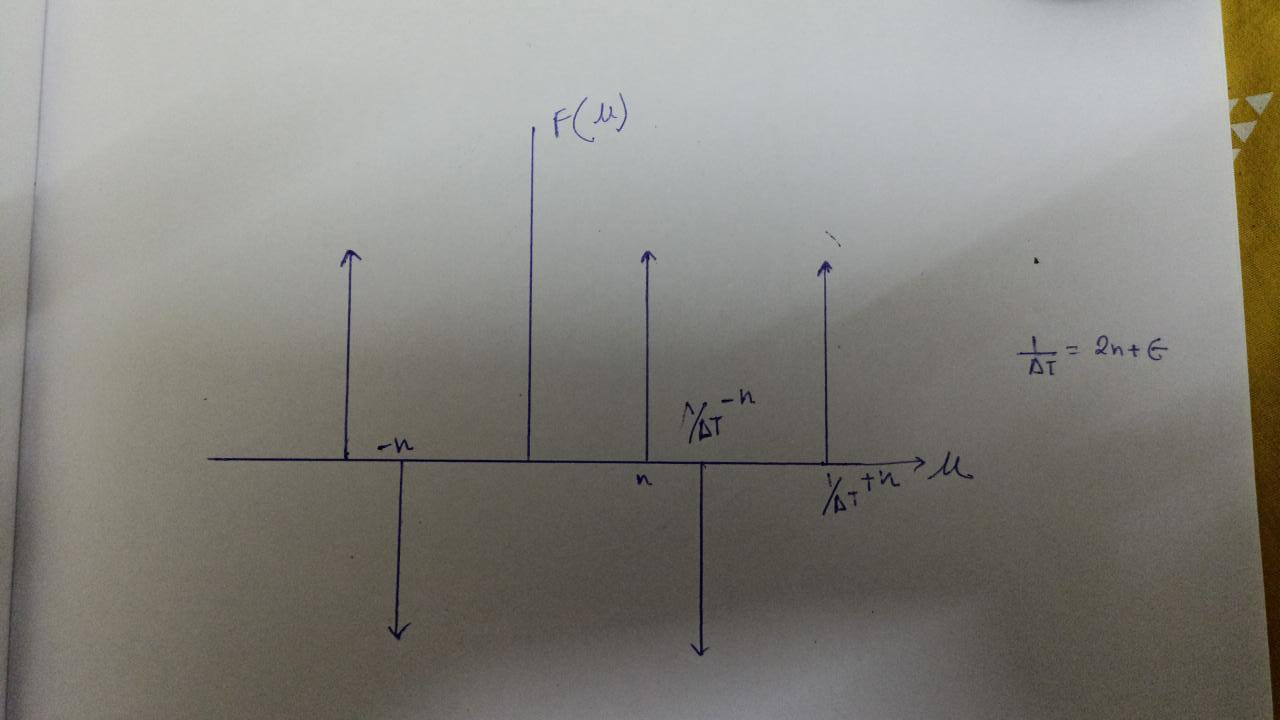

This is an inifnite repititions of the Fourier transform of $f(t) which can be restored when we perform inverse FT as there is no overlap between the copies or repititions.

####d) What would the sampled function look like in general if f(t) is sampled at a rate lower than the Nyquist rate?
####Ans:- 
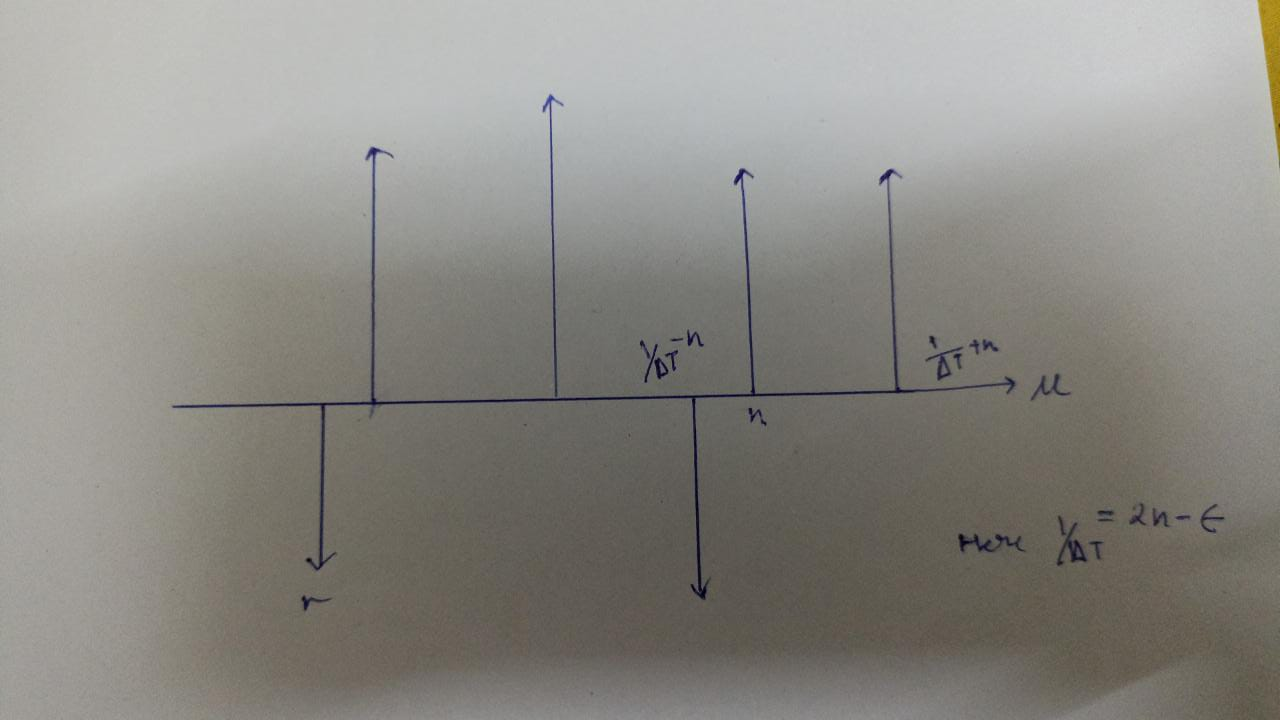

####e) What would the sampled function look like if f(t) is sampled at the Nyquist rate, with samples taken at $t = 0, \pm ΔT, \pm2ΔT$?
Ans  We know that the Nyquist sampling rate is 2n here, i.e $\dfrac{1}{ΔT} = 2n$, $ΔT = \dfrac{1}{2n}$
if we take samples at $t = 0, \pm ΔT, \pm2ΔT$ 
 it would produce the sampled function $sin(2\pi n\Delta T)$ whose values are all 0s because $\dfrac{1}{ΔT}$ and n is an integer


###$\color{yellow}{\text{4.18 Show that the 1-D convolution theorem given in Eqs. (4-25) and (4-26) also holds for discrete variables, }}$
###$\color{yellow}{\text{but with the right side of Eq. (4-26) multiplied by 1/M. That is, show that}}$
###$\color{yellow}{\text{(a) $(f⋆h)(x) \Longleftrightarrow (F\bullet H)(\mu) $}}$

###$\color{yellow}{\text{(b)$ (f\bullet h)(x) \Longleftrightarrow \dfrac{1}{M}(F⋆H)(\mu)$}}$

a) f(x) and h(x) is the finite length-sequence, let $y(x) = f(x) ⋆ h(x)$ denote their convolution.
So we can write $y(x)=\sum_{m=-∞}^{∞}f(m)h(x-m) $. 
Since $f(x)$ and $h(x)$ are finite-length sequences, the convolution can be written as a finite sum:
$$y(x)=\sum_{m=0}^{M-1}f(m)h(x-m) $$

where we have used the fact that $\sum_{m=0}^{M-1} e^{-j2\pi\mu x/M} = M\delta(x)$, where $\delta(x)$ is the Kronecker delta.
Now, let us take the DFT of both sides of this equation. Using the properties of the DFT, we have:

\begin{align*}
Y(x) &= \sum_{x=0}^{M-1} y(x)e^{-j2\pi\mu x/M} \\
&= \sum_{x=0}^{M-1} \sum_{m=0}^{m-1} f(m)h(x-m)e^{-j2\pi \mu x/M} \\
&= \sum_{m=0}^{m-1} f(m)e^{-j2\pi \mu m)/M}[\sum_{x=0}^{M-1}h(x-m)e^{-j2\pi \mu (x-m)/M}]\\
&= \sum_{m=0}^{m-1} f(m)e^{-j2\pi \mu m)/M}H(μ)\\
&= F(\mu)H(\mu) \\ 
\end{align*}

similarly we can prove the other side also.
Hence $(f⋆h)(x) \Longleftrightarrow (F\bullet H)(\mu) $ $\textbf{Proved}$

b) The fourier transform of $(f\bullet h)(x)$ is $\mathscr{F}(f(x)\bullet h(x))$

\begin{align*}
\mathscr{F}(f(x)\bullet h(x)) &= \sum_{x=0}^{M-1}f(x)\bullet h(x)e^{-2j\pi \mu x/M} \\
&= \sum_{x=0}^{M-1}(\frac{1}{M}\sum_{m=0}^{M-1}F(m)e^{2j\pi x m/M})\bullet  h(x)e^{-2j\pi \mu x/M} \text{[Applying inverse fourier transformation] }\\ 
&= \frac{1}{M}\sum_{m=0}^{M-1}F(m)\sum_{x=0}^{M-1}h(x)e^{-2j\pi x(\mu-m)/M}\\
&= \frac{1}{M}\sum_{m=0}^{M-1}F(m)H(\mu - m)\\
&= \frac{1}{M}F(\mu)\star H(\mu) 
\end{align*}
similarly we can prove the other side also.
Hence $(f\bullet h)(x) \Longleftrightarrow \dfrac{1}{M}(F \star H)(\mu) $ $\textbf{Proved}$

###4.21
####a)Suppose that the stripes of an image of the same size are four pixels wide. Sketch what the spectrum of the image would look like, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above.

###(b) Why are the components of the spectrum limited to the horizontal axis?

###(c) What would the spectrum look like for an image of the same size but having stripes that are one pixel wide? Explain the reason for your answer.

###(d) Are the dc terms in (a) and (c) the same, or are they different? Explain


In [ ]:
N = 200

image = np.zeros((N,N))

def stripes(image, k):
    c = 0
    for i in range(0, N, k):
        c += 1
        for j in range(0, N):
            if(c % 2 == 1):
                image[j, i:(i + k)] = 0
            else:
                image[j, i:(i + k)] = 255
                
    return(image)
            
image_1 = stripes(image.copy(), k = 1)    
image_2 = stripes(image.copy(), k = 2)
image_4 = stripes(image.copy(), k = 4)

magnitude_spectrum_image1 = np.abs(np.fft.fftshift(np.fft.fft2(image_1)))
magnitude_spectrum_image2 = np.abs(np.fft.fftshift(np.fft.fft2(image_2)))
magnitude_spectrum_image4 = np.abs(np.fft.fftshift(np.fft.fft2(image_4)))

Text(0.5, 1.0, 'Fourier spectrum of striped image (4 pixel wide)')

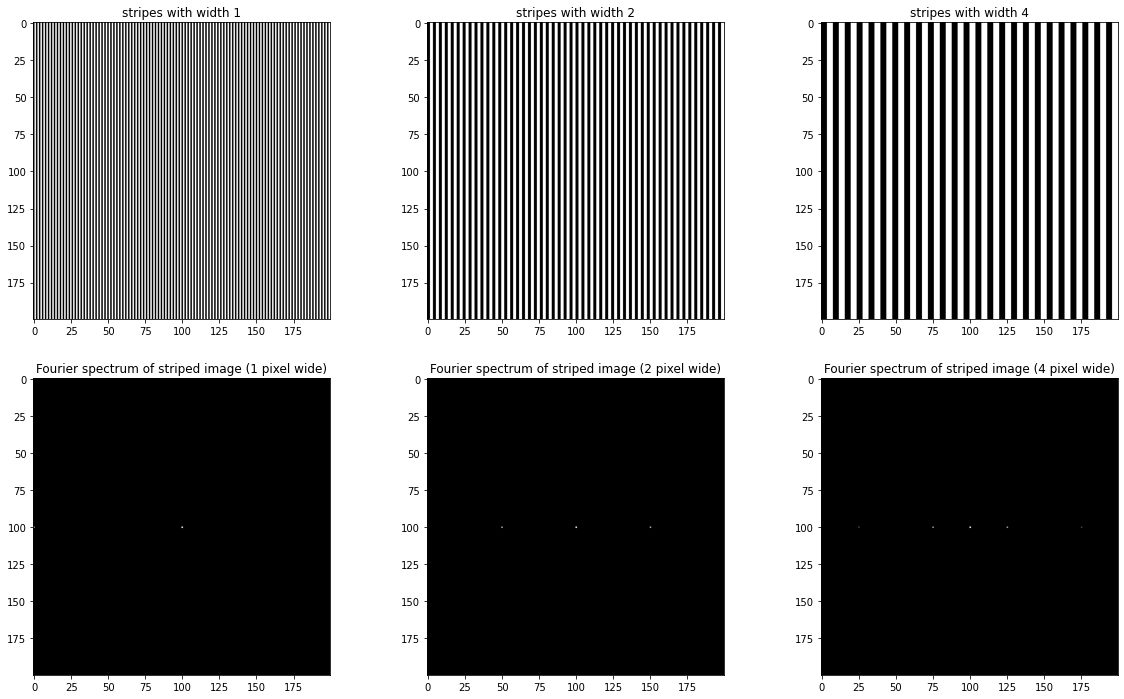

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))
axs[0,0].imshow(image_1,cmap='gray')
axs[0,0].set_title('stripes with width 1')
axs[0,1].imshow(image_2,cmap='gray')
axs[0,1].set_title('stripes with width 2')
axs[0,2].imshow(image_4,cmap='gray')
axs[0,2].set_title('stripes with width 4')
axs[1,0].imshow(magnitude_spectrum_image1,cmap='gray')
axs[1,0].set_title('Fourier spectrum of striped image (1 pixel wide)')
axs[1,1].imshow(magnitude_spectrum_image2,cmap='gray')
axs[1,1].set_title('Fourier spectrum of striped image (2 pixel wide)')
axs[1,2].imshow(magnitude_spectrum_image4,cmap='gray')
axs[1,2].set_title('Fourier spectrum of striped image (4 pixel wide)')


In [ ]:
M,N = image_2.shape
magnitude_spectrum_image1[M//2,N//2], magnitude_spectrum_image4[M//2,N//2]

(5100000.0, 5100000.0)

$\bullet$ (a) Subplots at (1,3) and (2,3) are the required striped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

$\bullet$ (b) The components of the fourier spectrum are limited only to the x-axis since the intensity of the pixel values change while moving along the x-axis from one pixel to another. The change in frequency along the y-axis is zero.

$\bullet$ (c) Subplots at (1,1) and (2,1) are the required striped image (of width 1 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

$\bullet$ (d) Dc terms in both the images (with width 1 pixel and 4 pixels) are the same since the central dc component is nothing but the average brightness of the image which is essentially the same for both cases.

###$\color{yellow}{\text{2. Download the image “moon.jpg”. Apply the following spatial filters to the image and compare the results}}$ 
###$\color{yellow}{\text{by plotting the images side-by-side:}}$
###$\color{yellow}{\text{a) box filter}}$
###$\color{yellow}{\text{b) Gaussian filter}}$
###$\color{yellow}{\text{c) Laplacian filter  apply the filter and display the Laplacian. Then use appropriate image addition to enhance}}$
###$\color{yellow}{\text{the edges. Display the result.}}$
###$\color{yellow}{\text{d) Sobel filter}}$

Text(0.5, 1.0, 'Origianl Image')

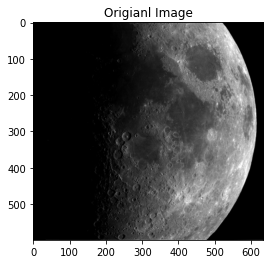

In [ ]:
moon = cv2.imread("/content/moon.jpg",0)
plt.imshow(moon,cmap='gray')
plt.title(label="Origianl Image")

Text(0.5, 1.0, 'Sobel Y')

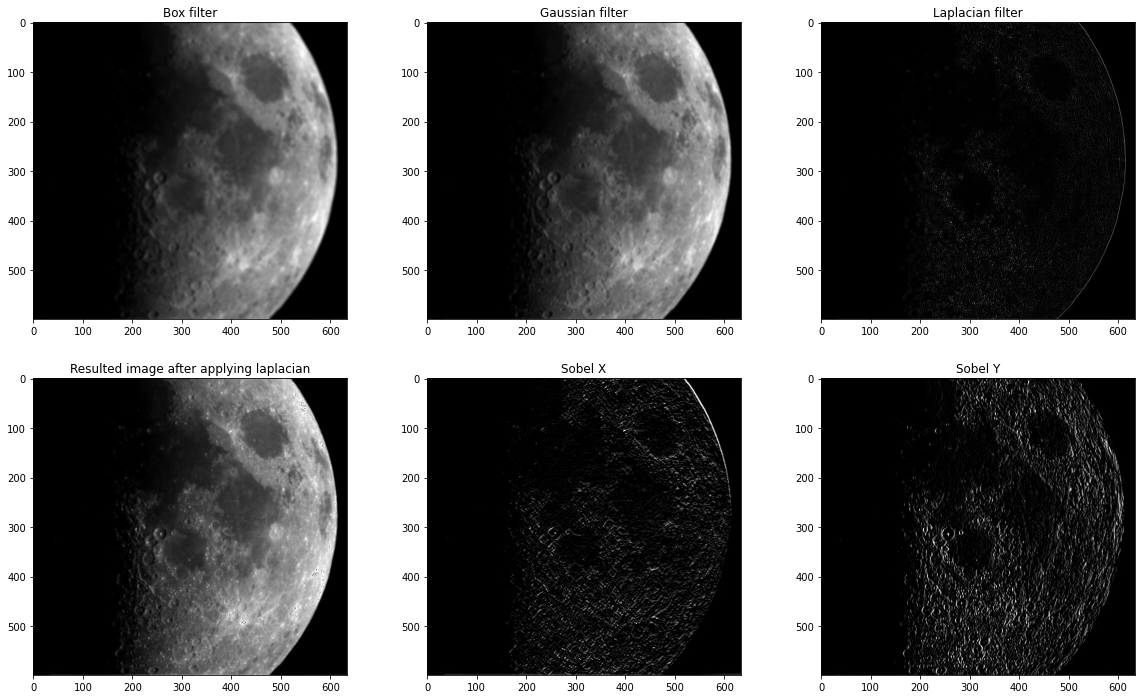

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))

#box filter 7*7
box = np.ones((7,7))/49

#gaussian filter 
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

#Laplacian Filter
laplacian = np.array(([0,1,0],[1,-4,1],[0,1,0]))
temp = cv2.filter2D(moon,-1,laplacian)
lap = temp  + moon
#Sobel Filter 
sobel_x = np.array(([-1,-2,-1],[0,0,0],[1,2,1]))
sobel_y = np.array(([-1,0,1],[-2,0,2],[-1,0,1]))


axs[0,0].imshow(cv2.filter2D(moon,-1,box),cmap='gray')
axs[0,0].set_title("Box filter")
axs[0,1].imshow(cv2.filter2D(moon,-1,gaussian),cmap='gray')
axs[0,1].set_title("Gaussian filter")
axs[0,2].imshow(cv2.filter2D(moon,-1,laplacian),cmap='gray')
axs[0,2].set_title("Laplacian filter")
axs[1,0].imshow(lap,cmap='gray')
axs[1,0].set_title("Resulted image after applying laplacian")
axs[1,1].imshow(cv2.filter2D(moon,-1,sobel_x),cmap='gray')
axs[1,1].set_title("Sobel X")
axs[1,2].imshow(cv2.filter2D(moon,-1,sobel_y),cmap='gray')
axs[1,2].set_title("Sobel Y")


In [ ]:
print("The Laplacian kernel is = ",laplacian)

The Laplacian kernel is =  [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


Box filter is bluring the image, Gaussian filter is also blurring the image but more uniformly and  by using laplacian filter we can enhance the edges, and detect detect the edges with better accuracy.   

###$\color{yellow}{\text{3) Generate a filled white rectangle at the center of a 100 × 100 pixel image, with rest of the pixels being black}}$
###$\color{yellow}{\text{and display its Fourier transform. Write a code that is flexible enough to generate any size of rectangle}}$
###$\color{yellow}{\text{so that you can observe the different effects)}}$

In [ ]:
def rectangle(size):
    img = np.zeros((100,100), dtype = np.uint8)
    M,N = img.shape
    c_row = M//2
    c_col = N//2
    rec_m, rec_n = size
  # creating rectangle in the middle
    img[(c_row - (rec_m//2)): (c_row+(rec_m//2)), (c_col - (rec_n//2)): (c_col+(rec_n//2))] = 255
    return img

####(a) Display the magnitude spectrum, the phase spectrum and the power spectrum of the above image so that the avarage of the pixel values is visible at the center.

In [ ]:
def spectrum(n):
    rect = rectangle((n,n))
    dft = cv2.dft(np.float32(rect),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
    magnitude_spectrum = 20 * np.log(1+magnitude_spectrum)
    power_spectrum = np.square(magnitude_spectrum)
    return magnitude_spectrum, phase_spectrum, power_spectrum 

Text(0.5, 1.0, 'Power Spectrum')

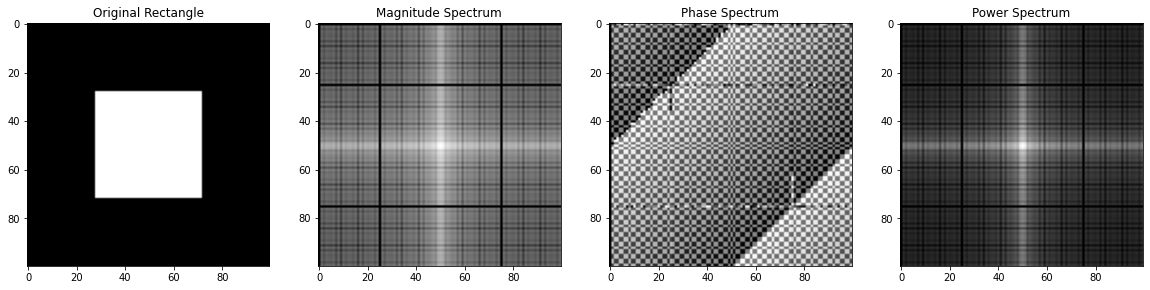

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (20, 12))
axs[0].imshow(rectangle((45,45)),cmap="gray")
axs[0].set_title("Original Rectangle")
axs[1].imshow(spectrum(45)[0],cmap='gray')
axs[1].set_title("Magnitude Spectrum")
axs[2].imshow(spectrum(45)[1],cmap='gray')
axs[2].set_title("Phase Spectrum")
axs[3].imshow(spectrum(45)[2],cmap='gray')
axs[3].set_title("Power Spectrum")

####(b)How does increasing/decreasing the size of the white rectangle affect the above spectral images? Provide an explanation for these changes (or lack of changes)

Text(0.5, 1.0, 'Power Spectrum')

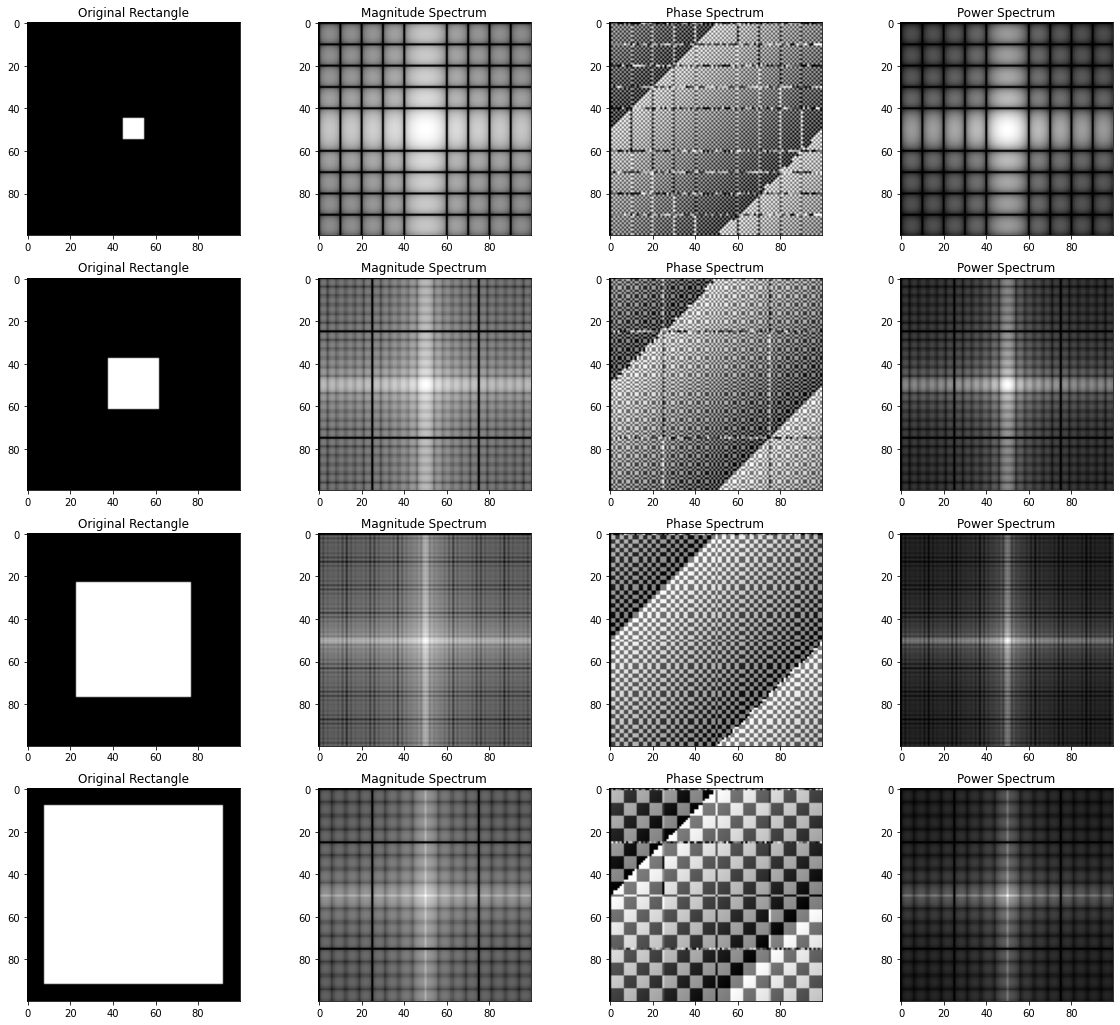

In [ ]:
#white rectangle size is 10x10
fig, axs = plt.subplots(4,4, figsize = (20, 18))
axs[0,0].imshow(rectangle((10,10)),cmap='gray')
axs[0,0].set_title("Original Rectangle")
axs[0,1].imshow(spectrum(10)[0],cmap='gray')
axs[0,1].set_title("Magnitude Spectrum")
axs[0,2].imshow(spectrum(10)[1],cmap='gray')
axs[0,2].set_title("Phase Spectrum")
axs[0,3].imshow(spectrum(10)[2],cmap='gray')
axs[0,3].set_title("Power Spectrum")

#white rectangle size is 25x25
axs[1,0].imshow(rectangle((25,25)),cmap='gray')
axs[1,0].set_title("Original Rectangle")
axs[1,1].imshow(spectrum(25)[0],cmap='gray')
axs[1,1].set_title("Magnitude Spectrum")
axs[1,2].imshow(spectrum(25)[1],cmap='gray')
axs[1,2].set_title("Phase Spectrum")
axs[1,3].imshow(spectrum(25)[2],cmap='gray')
axs[1,3].set_title("Power Spectrum")

#white rectangle size is 55x55
axs[2,0].imshow(rectangle((55,55)),cmap='gray')
axs[2,0].set_title("Original Rectangle")
axs[2,1].imshow(spectrum(55)[0],cmap='gray')
axs[2,1].set_title("Magnitude Spectrum")
axs[2,2].imshow(spectrum(55)[1],cmap='gray')
axs[2,2].set_title("Phase Spectrum")
axs[2,3].imshow(spectrum(55)[2],cmap='gray')
axs[2,3].set_title("Power Spectrum")

#white rectangle size is 85x85
axs[3,0].imshow(rectangle((85,85)),cmap='gray')
axs[3,0].set_title("Original Rectangle")
axs[3,1].imshow(spectrum(85)[0],cmap='gray')
axs[3,1].set_title("Magnitude Spectrum")
axs[3,2].imshow(spectrum(85)[1],cmap='gray')
axs[3,2].set_title("Phase Spectrum")
axs[3,3].imshow(spectrum(85)[2],cmap='gray')
axs[3,3].set_title("Power Spectrum")


Magnitude Spectrum: Increasing the size of the white rectangle leads to a broader peak in the magnitude spectrum, while decreasing the size of the white rectangle leads to a sharper peak. This is because a larger white rectangle contains more high-frequency components, which spread out the spectral content over a wider range of frequencies. The smaller white rectangle contains fewer high-frequency components, leading to a sharper peak in the magnitude spectrum.

Phase Spectrum: Increasing or decreasing the size of the white rectangle has little effect on the phase spectrum. The phase spectrum is mainly determined by the spatial arrangement of the image, and the size of the white rectangle has little influence on it.

Power Spectrum: The power spectrum is proportional to the square of the magnitude spectrum, so increasing the size of the white rectangle leads to a more spread-out power spectrum, while decreasing the size of the white rectangle leads to a more concentrated power spectrum. This is consistent with the changes in the magnitude spectrum.

###$\color{yellow}{\text{4)Comparison of low pass filters: use the image “ricegrains.jpg”.}}$

####a) Spatial Domain Filtering

In [ ]:
rice = cv2.imread("/content/ricegrains.jpg",0)
l=[3,5,7]
filters={}
for i in l:
    b = np.ones((i,i))/(i*i)
    filters["box_{0}".format(i)] = cv2.filter2D(rice,-1,b) 
    x = cv2.getGaussianKernel(i,1.5)
    filters["gauss_{0}".format(i)] = cv2.filter2D(rice,-1,x*x.T) 
    filters["median_{0}".format(i)] = cv2.medianBlur(rice,i)
filters = dict(sorted(filters.items(),key= lambda x:x[0],reverse=False))

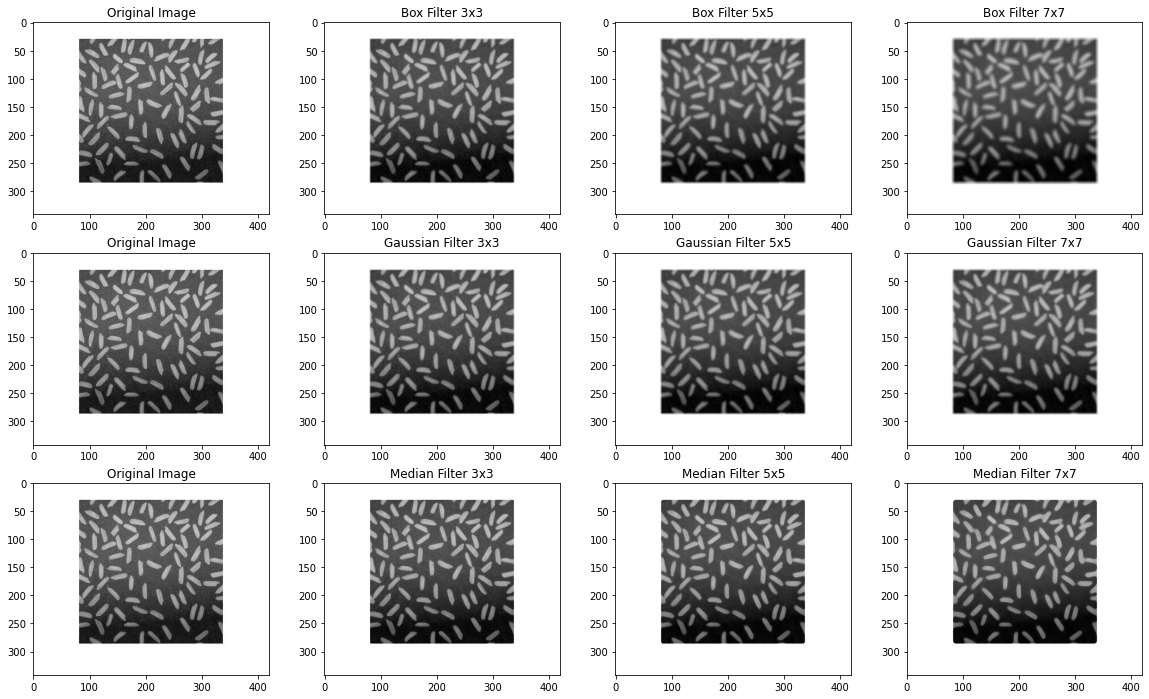

In [ ]:
fig, axs = plt.subplots(3,4, figsize = (20, 12))
for i in range(3):
    k=3
    for j in range(4):
        if j==0:
            axs[i,j].imshow(rice,cmap='gray')
            axs[i,j].set_title("Original Image")
        elif (i==0 and j!=0):
    
            axs[i,j].imshow(filters['box_'+str(k)],cmap='gray')
            axs[i,j].set_title("Box Filter " + str(k)+'x'+str(k))
            k=k+2
        elif (i==1 and j!=0):
            
            axs[i,j].imshow(filters['gauss_'+str(k)],cmap='gray')
            axs[i,j].set_title("Gaussian Filter " + str(k)+'x'+str(k))
            k=k+2
        elif (i==2 and j!=0):
            axs[i,j].imshow(filters['median_'+str(k)],cmap='gray')
            axs[i,j].set_title("Median Filter " + str(k)+'x'+str(k))
            k=k+2

####b) Frequency Domain Filtering

In [ ]:
def butterworth_lowpass(img, radius=20, n=4):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/radius)**(2*n)))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out
def gaussian_lowpass(img, radius):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
    
  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(radius**2))))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out.astype(np.uint8)

Text(0.5, 1.0, 'Gaussian Lowpass filter')

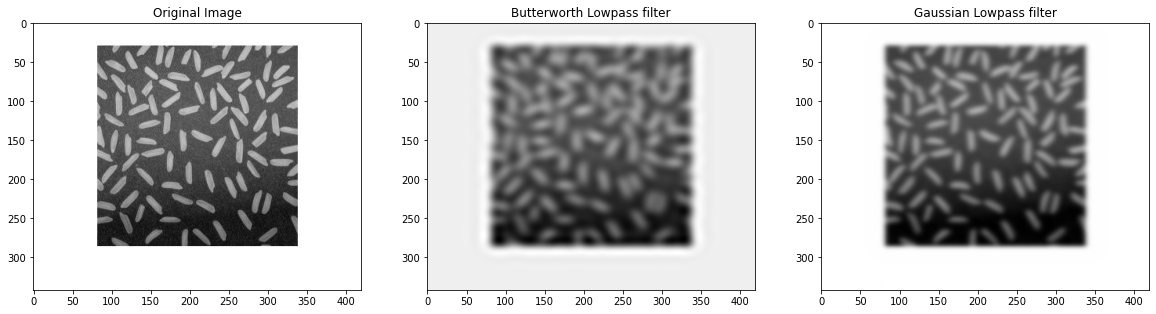

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20, 12))
axs[0].imshow(rice,cmap='gray')
axs[0].set_title("Original Image")
axs[1].imshow(butterworth_lowpass(rice, radius=20, n=4),cmap='gray')
axs[1].set_title("Butterworth Lowpass filter")
axs[2].imshow(gaussian_lowpass(rice, radius=20),cmap='gray')
axs[2].set_title("Gaussian Lowpass filter")

###$\color{yellow}{\text{5. Comparison of high pass filters: use the image “tigerbw.jpg”}}$

### a) Spatial domain filtering:- Apply unsharp masking, Sobel edge detector, and Laplace edge detection in the spatial domain to highlight the edges in the image.

In [ ]:
tiger = cv2.imread("/content/tigerbw.jpg",0)
blur = cv2.GaussianBlur(tiger, (3,3), 0)
                       
# difference image
mask = tiger - blur

# new image
unsharp = tiger + 1 * mask

laplacian = np.array(([0,1,0],[1,-4,1],[0,1,0])) 
# Sobel filters
# sobel in x direction
sobel_x = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# sobel in y direction
sobel_y = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])


Text(0.5, 1.0, 'Sobel_Y')

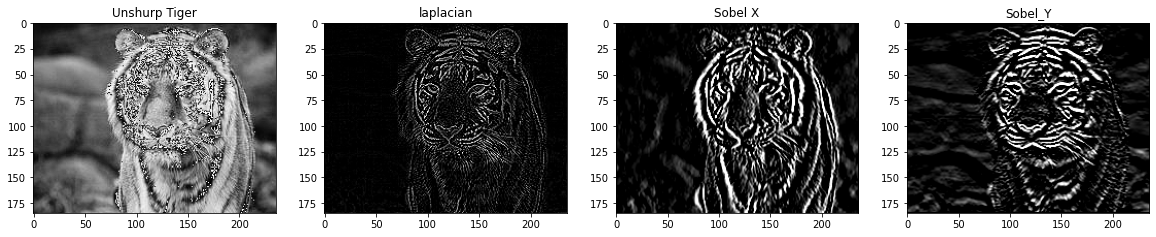

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (20, 12))
axs[0].imshow(unsharp,cmap="gray")
axs[0].set_title("Unshurp Tiger")
axs[1].imshow(cv2.filter2D(tiger,-1,laplacian),cmap='gray')
axs[1].set_title("laplacian")
axs[2].imshow(cv2.filter2D(tiger,-1,sobel_x),cmap='gray')
axs[2].set_title("Sobel X")
axs[3].imshow(cv2.filter2D(tiger,-1,sobel_y),cmap='gray')
axs[3].set_title("Sobel_Y")

####(b) Frequency domain filtering: Design a highpass frequency (use both Butterworth and Gaussian) filter in the frequency domain to highlight the edges in the image.

In [ ]:
def butterworth_high(img, radius = 20, n = 4):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = ((i - cx)**2 + (j - cy)**2) ** 0.5
            H[i,j] = 1/ (1 + (d/radius)**(2*n))
   
    final_f = imf * (1 - H)
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

def gaussian_pass_high(img, radius = 20):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = (i - cx)**2 + (j - cy)**2
            H[i,j] = np.exp(-(d/(2 * (radius**2))))
            
    final_f = imf * (1 - H)
        
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

 Edge detection in frequency domain 


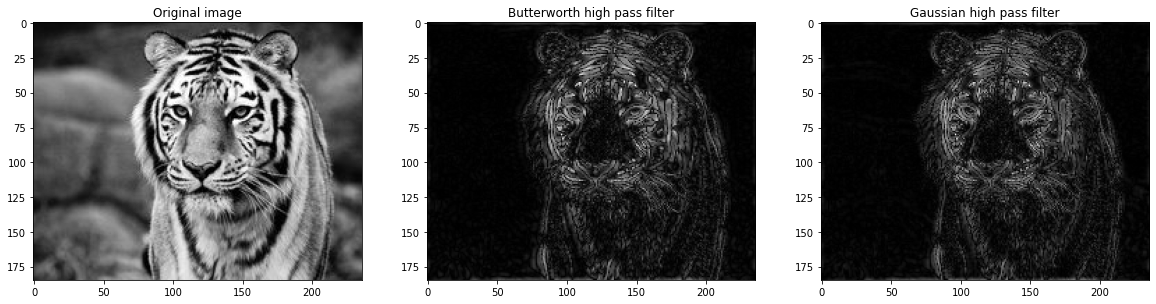

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20, 12))

axs[0].imshow(tiger, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(butterworth_high(tiger), cmap = 'gray')
axs[1].set_title('Butterworth high pass filter')

axs[2].imshow(gaussian_pass_high(tiger), cmap = 'gray')
axs[2].set_title('Gaussian high pass filter')

print(' Edge detection in frequency domain ')

plt.show()

###$\color{yellow}{\text{6. Convolution in the spatial and the frequency domain: There are two ways to implement spatial filters - one}}$ 
###$\color{yellow}{\text{is to apply convolution, the other is through multiplication in the frequency domain. Use “cameraman.jpg” as}}$
###$\color{yellow}{\text{ the testing image.}}$

####(a) Apply a 11 × 11 average filter in the spatial domain.

In [ ]:
cameraman= cv2.imread("/content/cameraman.jpg",0)
# Average filter of size 11x11
average_filter = np.ones((11,11))/121


# padding the image
start1 = time.time()

# applying the average filter to the image
filter_spatial = convolve2d(cameraman, average_filter, 'same')
end1 = time.time()
# extracting the useful part of the image
#final_image_spatial = filter_spatial[borders:(cameraman.shape[0] + borders), borders:(cameraman.shape[1] + borders)].copy()


print("Time taken = ",end1-start1)

Time taken =  0.03044271469116211


In [ ]:
borders = cameraman.shape[0]
image = cv2.copyMakeBorder(cameraman.copy(), 0, borders, 0, borders, cv2.BORDER_CONSTANT)


#transforming the image
f = np.fft.fft2(image)
trans_image = np.fft.fftshift(f)

#transforming the kernel
kernel = np.zeros(image.shape)
kernel[1:11, 1:11] = 1/121
k = np.fft.fft2(kernel)
trans_filter = np.fft.fftshift(k)

start2 = time.time()
multi = trans_image*trans_filter
end2 = time.time()
# transform the image back to spatial domain
result = np.abs(np.fft.ifft2(multi))

final_image_freq = result[4: cameraman.shape[0] + 4, 4: cameraman.shape[1] + 4]


print("Time taken = ",end2-start2)

Time taken =  0.002568960189819336


Text(0.5, 1.0, 'kernel filtered Image')

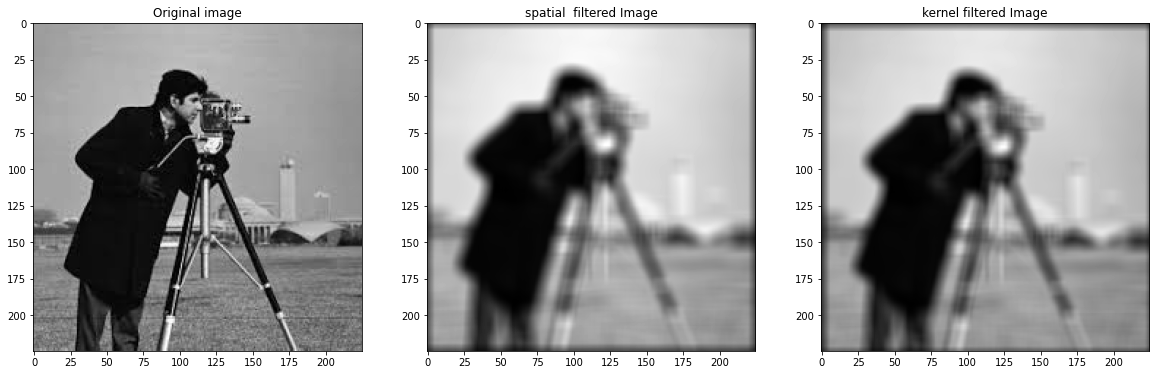

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20, 12))

axs[0].imshow(cameraman, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(filter_spatial, cmap = 'gray')
axs[1].set_title('spatial  filtered Image')

axs[2].imshow(final_image_freq, cmap = 'gray')
axs[2].set_title('kernel filtered Image')

####(c) Compare the time required for parts (a) and (b).

In [ ]:
print("Time taken for spatial domian = ",end1-start1)
print("Time taken for Freqation domian = ",end2-start2)


Time taken for spatial domian =  0.03044271469116211
Time taken for Freqation domian =  0.002568960189819336


Therefore when we do filtering in the frequency domain, it works quite faster than in the spatial domain.